In [ ]:
# Notebook for debugging the pipline

In [3]:
from dataset_processing import DatasetPreProcessor
from pipeline import Pipeline
import pandas as pd

2026-02-12 07:07:05,141 - root - INFO - Logging initialized. Log file: /Users/chris/logs/cognitive_language_model_logs/run_20260212_070705.log


In [19]:

base_path_linux = "/home/chris/gdrive"
base_path_mac = "/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD"
#json_path = base_path_linux + "/work/annabell/experiments/31/data_sets/nyc_squad_with_pretraining_commands.jsonl"
json_path = base_path_mac + "/work/annabell/experiments/32/data_sets/nyc_squad_with_pretraining_commands.jsonl"

pipeline = Pipeline(prepared_dataset_filepath=json_path)
pipeline.load_prepared_dataset()
#pipeline.run_pre_training_evaluation_testing()
#pipeline.run_evaluate_pre_training_results()
#pipeline.generate_pre_training_data()


2026-02-10 17:47:46,821 - pipeline - INFO - Loading prepared dataset from /Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/32/data_sets/nyc_squad_with_pretraining_commands.jsonl...
2026-02-10 17:47:48,523 - pipeline - INFO - Prepared dataset loaded successfully.


In [ ]:
#sum the number of distinct words in all of the pre-training commands in the dataset
def count_distinct_words_in_pre_training_commands(dataset):
    distinct_words = set()
    for index, row in dataset.iterrows():
        pre_training_command = row['command']
        if isinstance(pre_training_command, str):
            words = pre_training_command.split()
            distinct_words.update(words)
    return len(distinct_words)


dataset = pipeline.datasetPreProcessor.dataset
num_distinct_words = count_distinct_words_in_pre_training_commands(dataset)
print(f"Number of distinct words in pre-training commands: {num_distinct_words}")

In [21]:
dataset

,id,title,context,question,declarative_statement,answer,declarative_statement_formatted,question_formatted,answer_formatted,question_category,statement_category
0,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,In front of the Notre Dame Main Building stand...,a copper statue of Christ,in front of the Notre_Dame_Main_Building stand...,? what be in front of the Notre_Dame_Main_Buil...,a copper statue of Christ,Subject-Verb-Object-Adverbial,Subject-Verb-Adverbial
1,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,The Basilica of the Sacred Heart at **Notre Da...,the Main Building,the Basilica of the Sacred Heart at Notre_Dame...,? the Basilica of the sacred heart at Notre_Da...,the Main_Building,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object
2,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,The Grotto at Notre Dame is a Marian place of ...,a Marian place of prayer and reflection,the Grotto at Notre_Dame be a marian place of ...,? what be the Grotto at Notre_Dame,a marian place of prayer and reflection,Subject-Verb-Object-Complement,Subject-Verb-Complement
3,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,"Atop the Main Building of **Notre-Dame**, a go...",a golden statue of the Virgin Mary,atop the Main_Building of Notre - Dame a golde...,? what sit on top of the Main_Building at Notr...,a golden statue of the Virgin_Mary,Subject-Verb-Object-Adverbial,Subject-Verb-Complement
4,5733bf84d058e614000b61be,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",When did the Scholastic Magazine of Notre dame...,The *Scholastic Magazine of Notre Dame* began ...,September 1876,the Scholastic_Magazine of Notre_Dame begin pu...,? when do the Scholastic_Magazine of Notre dam...,September_1876,Subject-Verb-Adverbial,Subject-Verb-Adverbial
...,...,...,...,...,...,...,...,...,...,...,...
877,56d4f71e2ccc5a1400d833a8,Beyoncé,"In October 2014, Beyoncé signed a deal to laun...",What company did Beyoncé contract with to sell...,Beyoncé contracted with Topshop to sell her cl...,Topshop,Beyonce contract with Topshop to sell her clot...,? what company do Beyonce contract with to sel...,Topshop,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object-Complement
878,56d4f71e2ccc5a1400d833aa,Beyoncé,"In October 2014, Beyoncé signed a deal to laun...",What type of clothing does the British partner...,The British partnership with Beyoncé sells act...,activewear,the british partnership with Beyonce sell acti...,? what type of clothing do the british partner...,activewear,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object-Complement
879,56bed4553aeaaa14008c94e5,Beyoncé,"After Hurricane Katrina in 2005, Beyoncé and R...",What national disaster caused Beyonce to creat...,Beyoncé established the Survivor Foundation in...,Hurricane Katrina,Beyonce establish the Survivor_Foundation in r...,? what national disaster cause Beyonce to crea...,Hurricane_Katrina,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object-Complement
880,56bed4553aeaaa14008c94e8,Beyoncé,"After Hurricane Katrina in 2005, Beyoncé and R...",What hurricane years later after Katrina did t...,The organization provided support following Hu...,Ike,the organization provide support follow Hurric...,? what hurricane year_later after Katrina do t...,Ike,Subject-Verb-Indirect Object-Adverbial,Subject-Verb-Object-Adverbial


In [ ]:
pipeline.run_pre_training()
pipeline.run_pre_training_evaluation_testing()
pipeline.run_evaluate_pre_training_results()
pipeline.run_training()
pipeline.run_testing()
pipeline.run_evaluate_training_results()

In [5]:
import pandas as pd

fp = "/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/sandbox/data_sets/nyc_squad_without_pretraining_commands.jsonl"

df = pd.read_json(fp, lines=True)
#DatasetPreProcessor.count_created_commands_errors_in_df(df)
df


,id,title,context,question,declarative_statement,answer,declarative_statement_formatted,question_formatted,answer_formatted,question_category,statement_category,is_pretraining
0,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,In front of the Notre Dame Main Building stand...,a copper statue of Christ,in front of the Notre_Dame_Main_Building stand...,? what be in front of the Notre_Dame_Main_Buil...,a copper statue of Christ,Subject-Verb-Object-Adverbial,Subject-Verb-Adverbial,False
1,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,The Main Building stands beside the Basilica o...,the Main Building,the Main_Building stand beside the Basilica_of...,? the Basilica_of the sacred heart at Notre_Da...,the Main_Building,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Adverbial,True
2,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,The Grotto at Notre Dame serves as a Marian pl...,a Marian place of prayer and reflection,the Grotto at Notre_Dame serve as a marian pla...,? what be the Grotto at Notre_Dame,a marian place of prayer and reflection,Subject-Verb-Object-Complement,Subject-Verb-Complement,True
3,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,On top of the Main Building at Notre Dame sits...,a golden statue of the Virgin Mary,on top of the Main_Building at Notre_Dame sit ...,? what sit on top of the Main_Building at Notr...,a golden statue of the Virgin_Mary,Subject-Verb-Object-Adverbial,Subject-Verb-Adverbial,True
4,5733bf84d058e614000b61be,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",When did the Scholastic Magazine of Notre dame...,The Scholastic Magazine of Notre Dame began pu...,September 1876,the Scholastic_Magazine of Notre_Dame begin pu...,? when do the Scholastic_Magazine of Notre dam...,September_1876,Subject-Verb-Adverbial,Subject-Verb-Adverbial,True
5,5733bf84d058e614000b61bf,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How often is Notre Dame's the Juggler published?,The Juggler is published twice by Notre Dame.,twice,the Juggler be publish twice by Notre_Dame,? how often be Notre_Dames the Juggler publish,twice,Subject-Verb-Adverbial,Subject-Verb-Indirect Object-Direct Object,False
6,5733bf84d058e614000b61c0,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",What is the daily student paper at Notre Dame ...,The daily student paper at Notre Dame is calle...,The Observer,the daily student paper at Notre_Dame be call ...,? what be the daily student paper at Notre_Dam...,the Observer,Subject-Verb-Object,Subject-Verb-Object-Complement,True
7,5733bf84d058e614000b61bd,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How many student news papers are found at Notr...,Notre Dame features three student newspapers.,three,Notre_Dame feature three student newspaper,? how many student news paper be find at Notre...,three,Subject-Verb-Indirect Object,Subject-Verb-Object,False
8,5733bf84d058e614000b61c1,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",In what year did the student paper Common Sens...,The student paper *Common Sense* began publica...,1987,the student paper Common Sense begin publicati...,? in what_year do the student paper Common Sen...,1987,Subject-Verb-Indirect Object,Subject-Verb-Adverbial,True
9,5733bed24776f4190066118a,University_of_Notre_Dame,The university is the major seat of the Congre...,What is the oldest structure at Notre Dame?,The oldest structure located at Notre Dame is ...,Old College,the old structure locate at Notre_Dame be Old_...,? what be the old st

In [ ]:
"""2026-02-12 06:55:19,136 - commands - CRITICAL - Not all answer words were found in the declarative sentence. missing answer words: ['the', 'Observer']
2026-02-12 06:55:19,136 - commands - ERROR - Error creating commands for sample 5733bf84d058e614000b61c0: Not all answer words were found in the declarative sentence. missing answer words: ['the', 'Observer'] Declarative sentence: 'the daily student paper at Notre_Dame be call the Observer' Question: '? what be the daily student paper at Notre_Dame call' Answer: 'the Observer"""

In [ ]:
#find the row with id = "56d4eb762ccc5a1400d8334f"
dataframe = pipeline.datasetPreProcessor.dataset
dataframe[dataframe[
              'question'] == "After what movie portraying Etta James, did Beyonce create Sasha Fierce?"]

In [35]:
df_32[df_32['id'] == "57338724d058e614000b5c9f"]

,id,title,context,question,declarative_statement,answer,declarative_statement_formatted,question_formatted,answer_formatted,question_category,statement_category,is_pretraining,created_commands,created_commands_error,test_answer,test_answer_embedding,answer_formatted_embedding,test_answer_cosine_distance,test_answer_correct,test_answer_any_matching_word
19,57338724d058e614000b5c9f,University_of_Notre_Dame,In 1919 Father James Burns became president of...,What type of education was pushed at Notre Dam...,"Before adopting national standards, **Notre Da...",scholastic and classical,before adopt national standard Notre_Dame emph...,? what type of education be push at Notre_Dame...,scholastic and classical,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Adverbial,True,"['#id: 57338724d058e614000b5c9f', 'before adop...",False,national standard,"[-0.18714392, 0.012400757, 0.05882254, 0.01837...","[-0.065948516, 0.0046229525, -0.0070260884, -0...",0.585001,False,False


In [22]:
import os
from annabell_utilities import AnnabellLogfileInterpreter

log_dir = "/home/chris/gdrive/work/annabell/experiments/sandbox/logs"
log_filename = "annabell_pre_training_log.txt"
log_filepath = os.path.join(log_dir, log_filename)
log_filepath = '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/32/logs/annabell_pre_training_log.txt'
interpreter = AnnabellLogfileInterpreter(log_filepath)
interpreter.parse_entries()

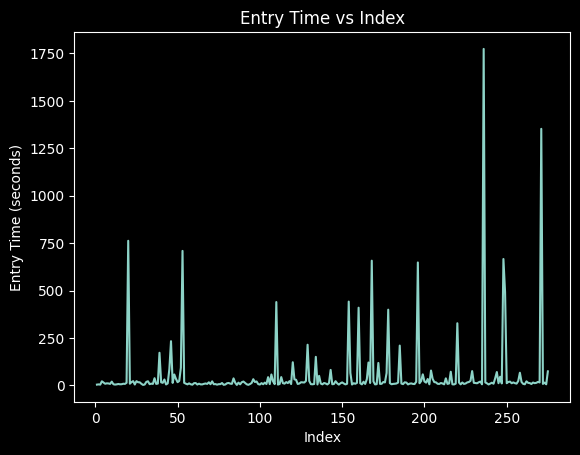

In [23]:
#create a graph of entry time vs index
import matplotlib.pyplot as plt

plt = interpreter.plot_entry_time_vs_sample_number()
plt.show()

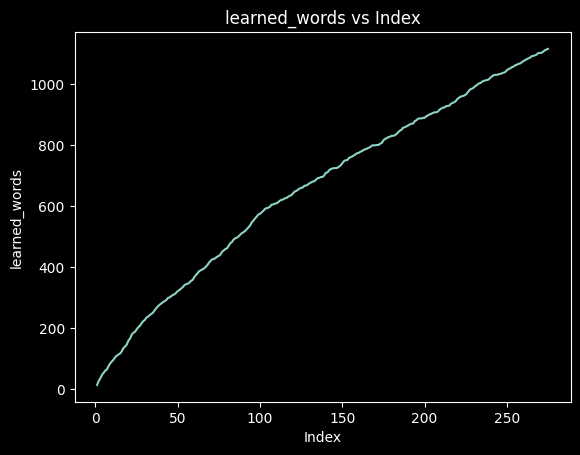

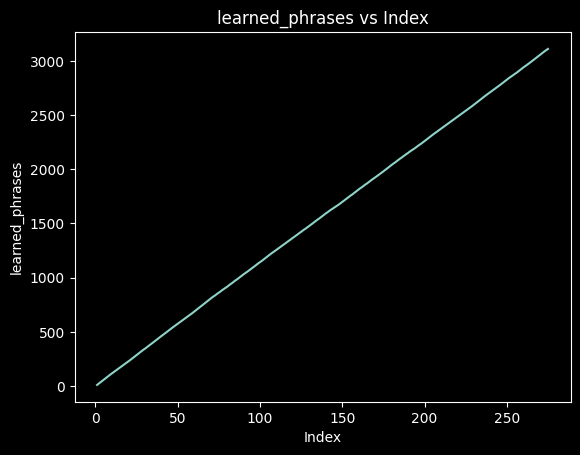

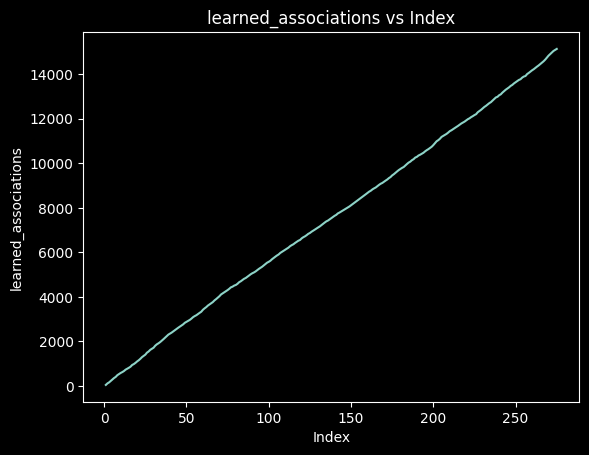

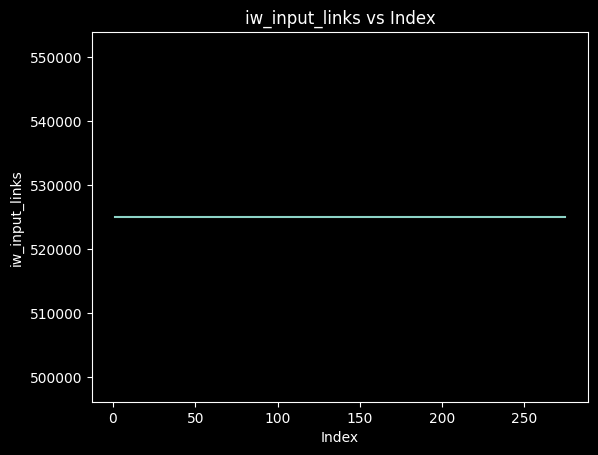

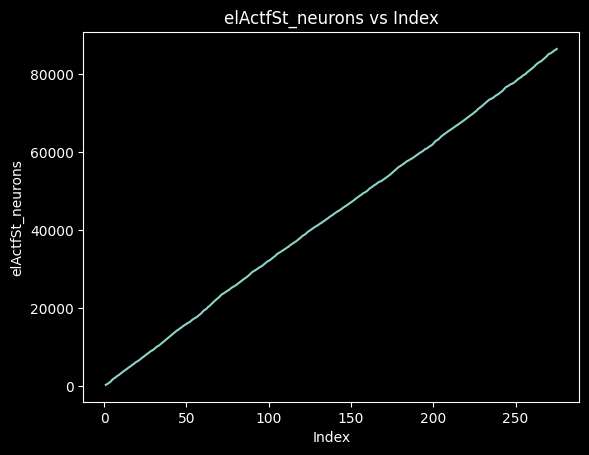

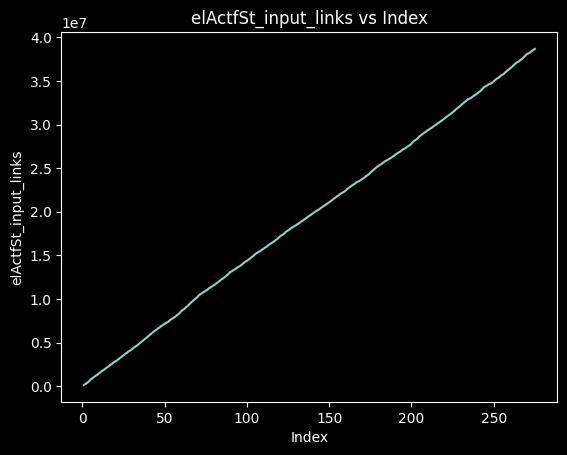

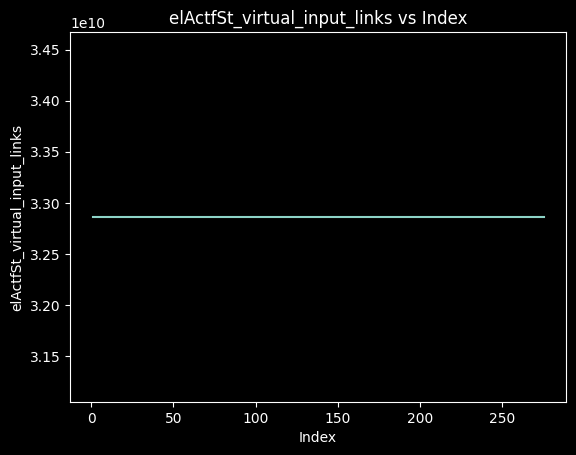

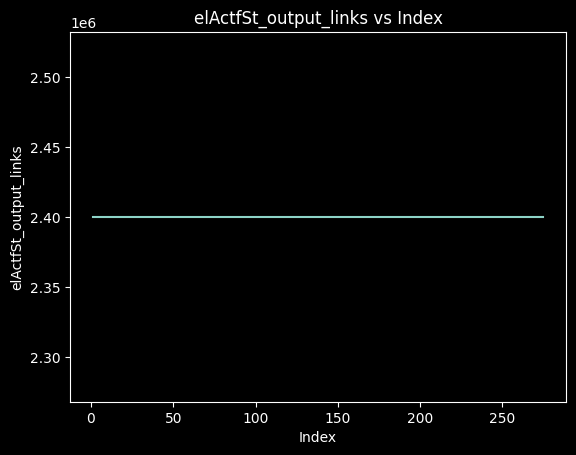

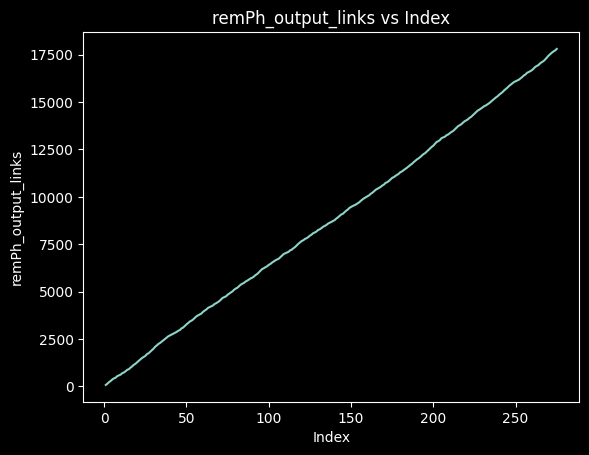

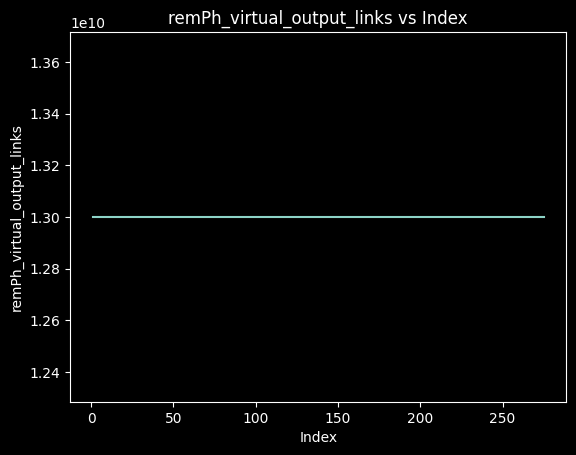

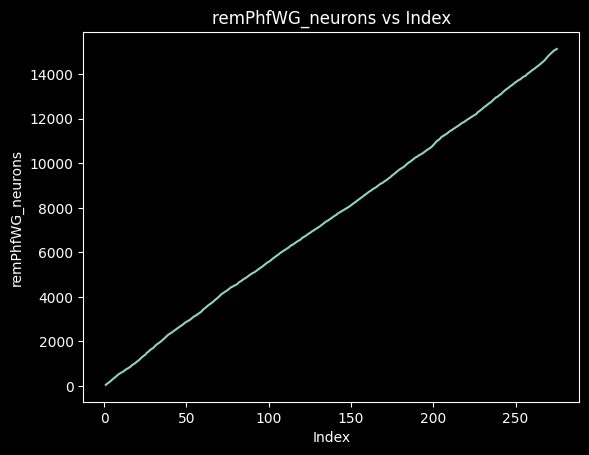

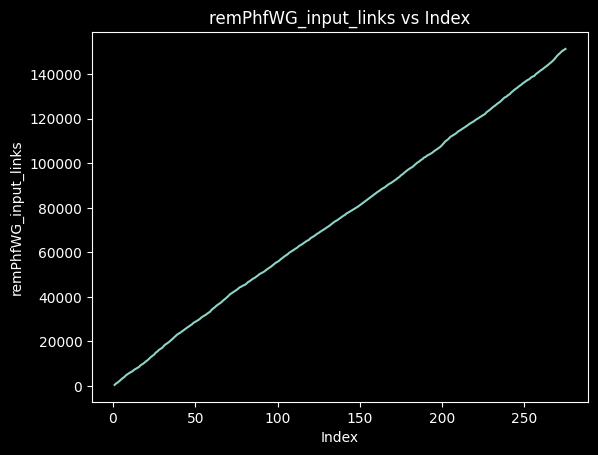

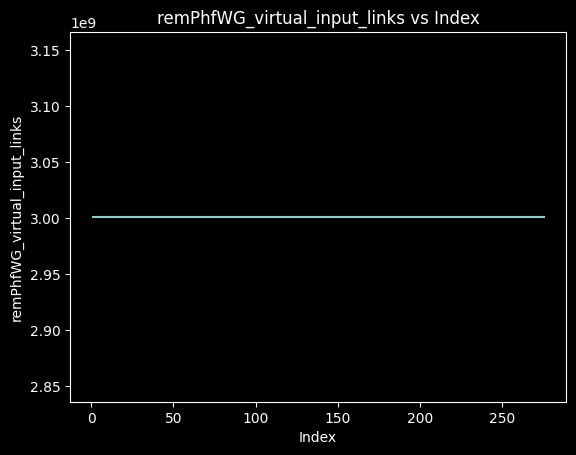

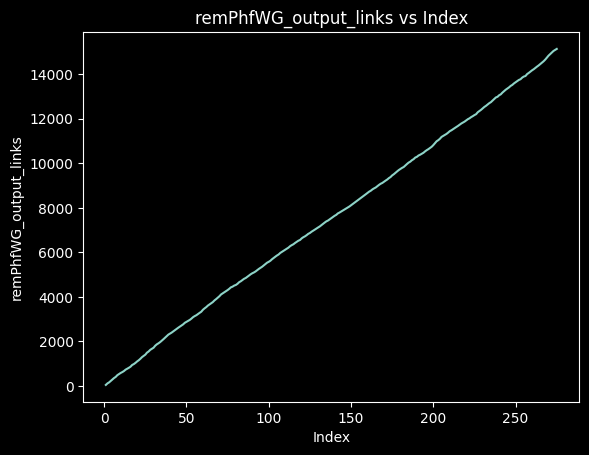

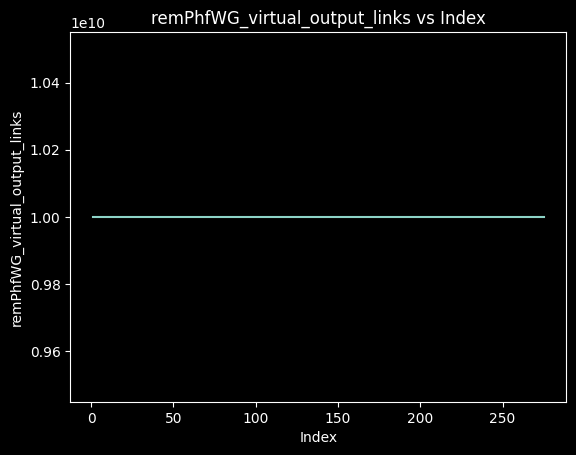

In [24]:
#plot a graph showing each stat measure vs index
for plt in interpreter.plot_stat_measures_vs_index():
    plt.show()

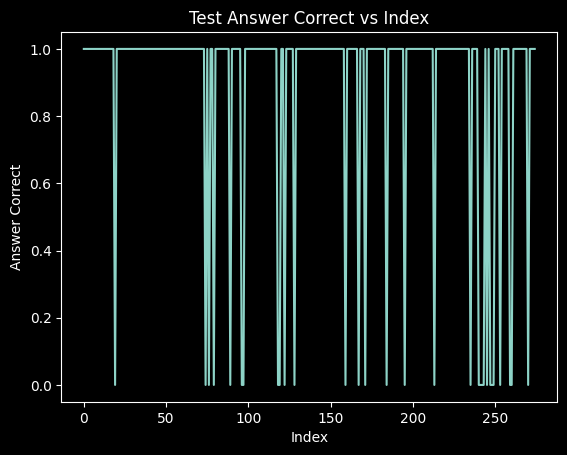

In [25]:
#plot a graph showing "test_answer_correct" vs index
import matplotlib.pyplot as plt
import pandas as pd


def plot_test_answer_correct(the_df):
    plt.plot(the_df.index, the_df["test_answer_correct"])
    plt.xlabel("Index")
    plt.ylabel("Answer Correct")
    plt.title("Test Answer Correct vs Index")
    plt.show()


df_25 = pd.read_csv(
    '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/32/pre_training/results/test_detailed_results_tsv',
    sep='\t')
plot_test_answer_correct(df_25)

In [27]:
df_32 = pd.read_csv(
    '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/32/pre_training/results/test_detailed_results_tsv',
    sep='\t')

In [28]:
df_32

,id,title,context,question,declarative_statement,answer,declarative_statement_formatted,question_formatted,answer_formatted,question_category,statement_category,is_pretraining,created_commands,created_commands_error,test_answer,test_answer_embedding,answer_formatted_embedding,test_answer_cosine_distance,test_answer_correct,test_answer_any_matching_word
0,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,In front of the Notre Dame Main Building stand...,a copper statue of Christ,in front of the Notre_Dame_Main_Building stand...,? what be in front of the Notre_Dame_Main_Buil...,a copper statue of Christ,Subject-Verb-Object-Adverbial,Subject-Verb-Adverbial,True,"['#id: 5733be284776f4190066117f', 'in front of...",False,a copper statue of Christ,"[-0.16306198, -0.0069314414, -0.022022245, 0.0...","[-0.16306198, -0.0069314414, -0.022022245, 0.0...",0.000000,True,True
1,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,The Basilica of the Sacred Heart at **Notre Da...,the Main Building,the Basilica of the Sacred Heart at Notre_Dame...,? the Basilica of the sacred heart at Notre_Da...,the Main_Building,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object,True,"['#id: 5733be284776f41900661180', 'the Basilic...",False,the Main_Building,"[-0.14481898, 0.03785048, 0.038150158, 0.00632...","[-0.14481898, 0.03785048, 0.038150158, 0.00632...",0.000000,True,True
2,5733bf84d058e614000b61bf,University_of_Notre_Dame,"As at most other universities, Notre Dame's st...",How often is Notre Dame's the Juggler published?,"The Juggler, associated with Notre Dame, is pu...",twice,the Juggler associate with Notre_Dame be publi...,? how often be Notre_Dames the Juggler publish,twice,Subject-Verb-Adverbial,Subject-Verb-Complement,True,"['#id: 5733bf84d058e614000b61bf', 'the Juggler...",False,twice,"[-0.20139828, 0.0046490687, 0.047194127, 0.067...","[-0.20139828, 0.0046490687, 0.047194127, 0.067...",0.000000,True,True
3,5733a6424776f41900660f51,University_of_Notre_Dame,The College of Engineering was established in ...,How many BS level degrees are offered in the C...,The College of Engineering at the University o...,eight,the College_of_Engineering at the University_o...,? how many bs level degree be offer in the Col...,eight,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object-Complement,True,"['#id: 5733a6424776f41900660f51', 'the College...",False,eight,"[-0.19315143, -0.015253769, 0.001452832, 0.035...","[-0.19315143, -0.015253769, 0.001452832, 0.035...",0.000000,True,True
4,5733a6424776f41900660f52,University_of_Notre_Dame,The College of Engineering was established in ...,The College of Science began to offer civil en...,The College of Science at the University of No...,the 1870s,the College_of_Science at the University_of_No...,? the College_of_Science begin to offer civil ...,the 1870s,Subject-Verb-Adverbial,Subject-Verb-Object-Adverbial,True,"['#id: 5733a6424776f41900660f52', 'the College...",False,the 1870s,"[-0.11635341, 0.05761948, 0.00496523, -0.00096...","[-0.11635341, 0.05761948, 0.00496523, -0.00096...",0.000000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,56d4f6e02ccc5a1400d833a1,Beyoncé,"In 2005, Beyoncé teamed up with House of Brand...",Who did Beyoncé team up with in 2010 to get he...,"In 2010, Beyoncé collaborated with C&A to intr...",C&A,in 2010 Beyonce collaborate with CA to introdu...,? who do Beyonce team up with in 2010 to get h...,CA,Subject-Verb-Indirect Object-Direct Object,Subject-Verb-Object-Adverbial,True,"['#id: 56d4f6e02ccc5a1400d833a1', 'in 2010 Bey...",False,Brazil,"[-0.19133866, -0.056548912, 0.019932793, -0.00...","[-0.21305451, -0.0068882937, 0.005917946, -0.0...",0.352781,False,False
271,56d4f6e02ccc5a1400d833a2,Beyoncé,"In 2005, Beyoncé teamed u

In [30]:
#sum the number of distinct words in all of the pre-training commands in the dataset
def count_distinct_words_in_pre_training_commands(the_dataset, up_to_index):
    distinct_words = set()
    for index, row in the_dataset.iterrows():
        if index > up_to_index:
            break
        dec_statement = row["declarative_statement_formatted"]
        question = row["question_formatted"]
        d_words = dec_statement.split()
        q_words = question.split()
        words = d_words + q_words
        distinct_words.update(words)
    return len(distinct_words)


num_distinct_words = count_distinct_words_in_pre_training_commands(df_32, up_to_index=268)
print(f"Number of distinct words in pre-training commands: {num_distinct_words}")

Number of distinct words in pre-training commands: 1102


In [16]:
pre_1000_entry = interpreter.entries[184]
print(
    f"Sample number: {pre_1000_entry.sample_number()}, Learned Words: {pre_1000_entry.learned_words()}, Time: {pre_1000_entry.time()} seconds")
post_1000_entry = interpreter.entries[189]
print(
    f"Sample number: {post_1000_entry.sample_number()}, Learned Words: {post_1000_entry.learned_words()}, Time: {post_1000_entry.time()} seconds")

Sample number: 185, Learned Words: 981, Time: 13.25336199999947 seconds
Sample number: 190, Learned Words: 1000, Time: 18.794857000000775 seconds


In [ ]:
['#id: 5733be284776f41900661180', 'the Basilica of the Sacred Heart at Notre_Dame be', 'adjacent to the Main_Building',
 '#END OF DECLARATION', '\n', '? the Basilica of the sacred heart at Notre_Dame', 'be beside to which structure',
 '#END OF QUESTION', '.sctx ? the Basilica of the sacred heart at Notre_Dame', '.pg Basilica', '.wg Notre_Dame', '.ggp',
 '.ph the Basilica of the Sacred Heart at Notre_Dame be', '.drop_goal', '.sctx adjacent to the Main_Building',
 '.wg the Main_Building', '.rw', '\n', '#END OF COMMANDS', '.time', '#END OF TIME']

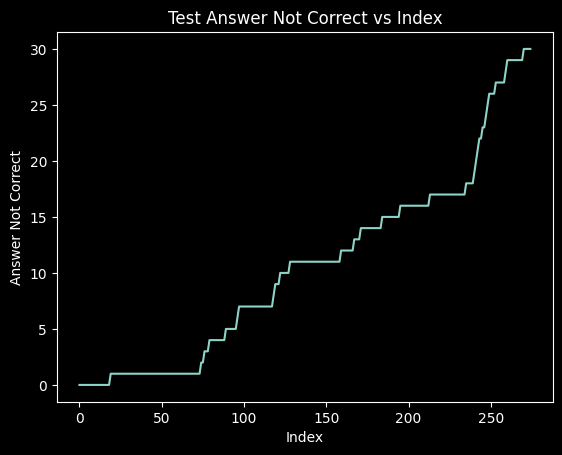

In [31]:
#plot a graph showing sum of "test_answer_correct" == flase vs index
import matplotlib.pyplot as plt
import pandas as pd


def plot_test_answer_correct(the_df):
    plt.plot(the_df.index, the_df["test_answer_correct"].apply(lambda x: 0 if x else 1).cumsum())
    plt.xlabel("Index")
    plt.ylabel("Answer Not Correct")
    plt.title("Test Answer Not Correct vs Index")
    plt.show()


df_25 = pd.read_csv(
    '/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/30/pre_training/results/test_detailed_results_tsv',
    sep='\t')
plot_test_answer_correct(df_32)

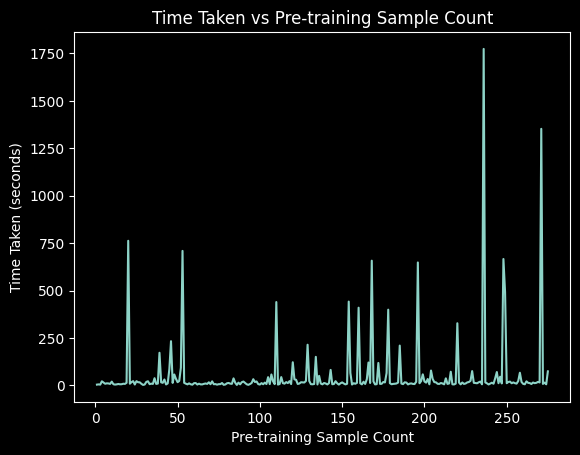

In [32]:
    #using the logfile intepreter, plot a graph of the time taken for each pre-training sample vs the count of the sample
import matplotlib.pyplot as plt


def plot_time_taken_vs_sample_count(the_interpreter):
    sample_counts = []
    time_taken = []
    for entry in the_interpreter.entries:
        sample_counts.append(entry.sample_number())
        time_taken.append(entry.time())
    plt.plot(sample_counts, time_taken)
    plt.xlabel("Pre-training Sample Count")
    plt.ylabel("Time Taken (seconds)")
    plt.title("Time Taken vs Pre-training Sample Count")
    plt.show()


plot_time_taken_vs_sample_count(interpreter)


In [36]:
commands = ['#id: 57338724d058e614000b5c9f',
            'before adopt national standard Notre_Dame emphasize scholastic and classical', 'education',
            '#END OF DECLARATION', '\n', '? what type of education be push at Notre_Dame',
            'before its embracing of national standard', '#END OF QUESTION',
            '.sctx ? what type of education be push at Notre_Dame', '.pg education', '.pg Notre_Dame',
            '.sctx before its embracing of national standard', '.wg national standard', '.ggp',
            '.ph before adopt national standard Notre_Dame emphasize scholastic and classical', '.drop_goal',
            '.drop_goal', '.wg scholastic and classical', '.rw', '\n', '#END OF COMMANDS', '.time', '#END OF TIME',
            '.stat', '#END OF STATS']
for command in commands:
    print(command)

#id: 57338724d058e614000b5c9f
before adopt national standard Notre_Dame emphasize scholastic and classical
education
#END OF DECLARATION


? what type of education be push at Notre_Dame
before its embracing of national standard
#END OF QUESTION
.sctx ? what type of education be push at Notre_Dame
.pg education
.pg Notre_Dame
.sctx before its embracing of national standard
.wg national standard
.ggp
.ph before adopt national standard Notre_Dame emphasize scholastic and classical
.drop_goal
.drop_goal
.wg scholastic and classical
.rw


#END OF COMMANDS
.time
#END OF TIME
.stat
#END OF STATS
